In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos_graficar = ['PTS', 'FGA', 'FGM', 'MIN','FP','TOV', 'RANK', 'AGE', '3P%']



años = [2024,2023,2022,2021,2020,2019,2018,2017,2016]

def filtrar_datos(df_data,año_contrato,año_estadisticas):   #retorna df_correlacion
    df_nuevo = df_data.copy()
    df_correlacion = df_nuevo.loc[:,'Contrato {}'.format(año_contrato)]
    df_año_estadisticas = df_nuevo.filter(like= str(año_estadisticas))
    df_año_estadisticas.drop(columns = 'Contrato {}'.format(año_estadisticas), inplace = True)
    df_año_estadisticas.drop(columns = 'Equipo {}'.format(año_estadisticas), inplace = True)
    df_correlacion = pd.concat([df_correlacion, df_año_estadisticas],axis = 1)
    return df_correlacion

def graficar_todos_dispersion(dato_interes, df):
  contrato = df.filter(like= 'Contrato').drop(columns='Contrato 2016')
  contrato = contrato.stack(dropna=False).reset_index(drop=True)

  estadistica = df.filter(like= dato_interes).drop(columns='{} 2024'.format(dato_interes))
  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)

  # Gráfico de dispersión entre estadísticas y contrato
  plt.scatter(estadistica, contrato, s = 20, c = 'red')
  plt.title('{} vs. contrato'.format(dato_interes))
  plt.xlabel("{}".format(dato_interes))
  plt.ylabel("Valor contrato")

  # Agregar una cuadrícula
  plt.grid(True)

  # Mostrar la gráfica
  plt.show()

def seleccionar_todos_dispersion(dato_interes, df):   #retorna estadistica y contrato
  contrato = df.filter(like= 'Contrato').drop(columns='Contrato 2016')
  contrato = contrato.stack(dropna=False).reset_index(drop=True)

  estadistica = df.filter(like= dato_interes).drop(columns='{} 2024'.format(dato_interes))

  estadistica = estadistica.stack(dropna=False).reset_index(drop=True)

  return estadistica, contrato

def graficar_individual_linea(datos_interes, df, player):
  fig, axes = plt.subplots(3, 3, figsize=(12, 8))
  df_player = df.loc[df['Nombre'] == player]
  y = df_player.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  for i in range(len(datos_interes)):
    #x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
    x = df_player.filter(like= datos_interes[i]).drop(columns = '{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
    print(x)
    print(y)
    if i < 3:
      axes[0,i].plot(x, y)
      axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
    elif i >= 3 and i < 6:
      axes[1,i - 3].plot(x, y)
      axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
    else:
      axes[2,i - 6].plot(x, y)
      axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  plt.show()

def graficar_individual_scatter(datos_interes, df, player):
  fig, axes = plt.subplots(3, 3, figsize=(12, 8))
  df_player = df.loc[df['Nombre'] == player]
  y = df_player.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  for i in range(len(datos_interes)):
    #x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
    x = df_player.filter(like= datos_interes[i]).drop(columns = '{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
    print(x)
    print(y)
    if i < 3:
      axes[0,i].scatter(x, y)
      axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
    elif i >= 3 and i < 6:
      axes[1,i - 3].scatter(x, y)
      axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
    else:
      axes[2,i - 6].scatter(x, y)
      axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
  # Especificar la ruta donde quieres guardar la gráfica 
  ruta_guardado = f"C:/Users/gabog/OneDrive/Documentos/Curso de samsumg/ProyectoPowerRangers/Analisis_Datos/GraficasIndividuales/{player.replace(' ', '_')}.png" 
  plt.savefig(ruta_guardado) # Guardar la gráfica en la ruta especificada
  plt.tight_layout()
  plt.show()



ruta_de_acceso = r"C:\Users\gabog\OneDrive\Documentos\Curso de samsumg\ProyectoPowerRangers\Datos\datos_todas_las_jugadoras_posibles.csv"
df = pd.read_csv(ruta_de_acceso) #Archivo 'datos_todas_las_jugadoras_posibles.csv'
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\t', ' ')


Se observa como ha variado el promedio de PTS a traves de los años

<Axes: >

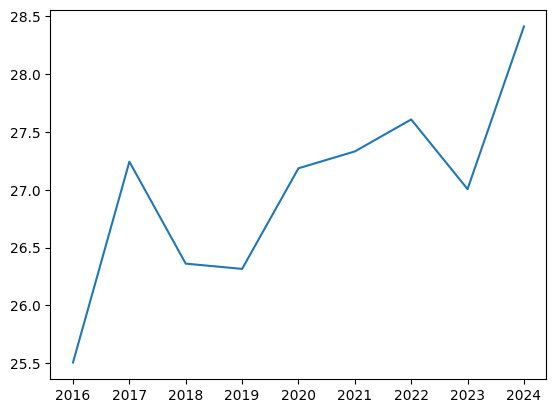

In [5]:
df_3PP = df.filter(like = '3P%')
df_3PP_per_year = df_3PP.describe().loc['mean']
df_3PP_per_year.index = pd.RangeIndex(start=2024, stop=2015, step=-1)
df_3PP_per_year.plot(kind = 'line')

Se observa la jugadora Sue Bird

In [28]:
x = df.loc[df['Nombre'] == 'ALANA BEARD']

# Filtrar las columnas
columnas_filtradas = ['Nombre', 'Contrato 2024', 'Contrato 2023', 'Contrato 2022', 'Contrato 2021', 'Contrato 2020','Contrato 2019','Contrato 2018','Contrato 2017','Contrato 2016', 'PTS 2023', 'PTS 2022', 'PTS 2021', 'PTS 2020','PTS 2019','PTS 2018','PTS 2017','PTS 2016']
df_filtrado2 = x[columnas_filtradas]
print(df_filtrado2)

          Nombre  Contrato 2024  Contrato 2023  Contrato 2022  Contrato 2021  \
279  ALANA BEARD            NaN            NaN            NaN            NaN   

     Contrato 2020  Contrato 2019  Contrato 2018  Contrato 2017  \
279            NaN       108000.0            NaN            NaN   

     Contrato 2016  PTS 2023  PTS 2022  PTS 2021  PTS 2020  PTS 2019  \
279            NaN       NaN       NaN       NaN       NaN       3.3   

     PTS 2018  PTS 2017  PTS 2016  
279       4.0       6.9       7.1  


In [37]:
df_jugadora_a_graficar = df.loc[df['Nombre'] == 'ALANA BEARD']
df_jugadora_contratos = df_jugadora_a_graficar.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
df_jugadora_pts = df_jugadora_a_graficar.filter(like= 'PTS').drop(columns = 'PTS 2024').stack().reset_index(drop=True)
print(df_jugadora_contratos,df_jugadora_pts,df_jugadora_a_graficar)

0    108000.0
dtype: float64 0    3.3
1    4.0
2    6.9
3    7.1
dtype: float64           Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
279  ALANA BEARD            NaN         NaN            NaN         NaN   

     Contrato 2022 Equipo 2022  Contrato 2021 Equipo 2021  Contrato 2020  ...  \
279            NaN         NaN            NaN         NaN            NaN  ...   

    REB 2016  AST 2016 TOV 2016  STL 2016 BLK 2016  PF 2016 FP 2016  DD2 2016  \
279      3.3       2.1      1.3       1.7      0.6      2.8    17.5       0.0   

    TD3 2016  +/- 2016  
279      0.0       6.4  

[1 rows x 271 columns]


jugadora: NATASHA HOWARD
['PTS', 'FGA', 'FGM', 'MIN', 'FP', 'TOV', 'RANK', 'AGE', '3P%'] NATASHA HOWARD


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gabog\\OneDrive\\Documentos\\Curso de samsumg\\ProyectoPowerRangers\\Analisis_Datos\\GraficasIndividuales\\NATASHA_HOWARD.png'

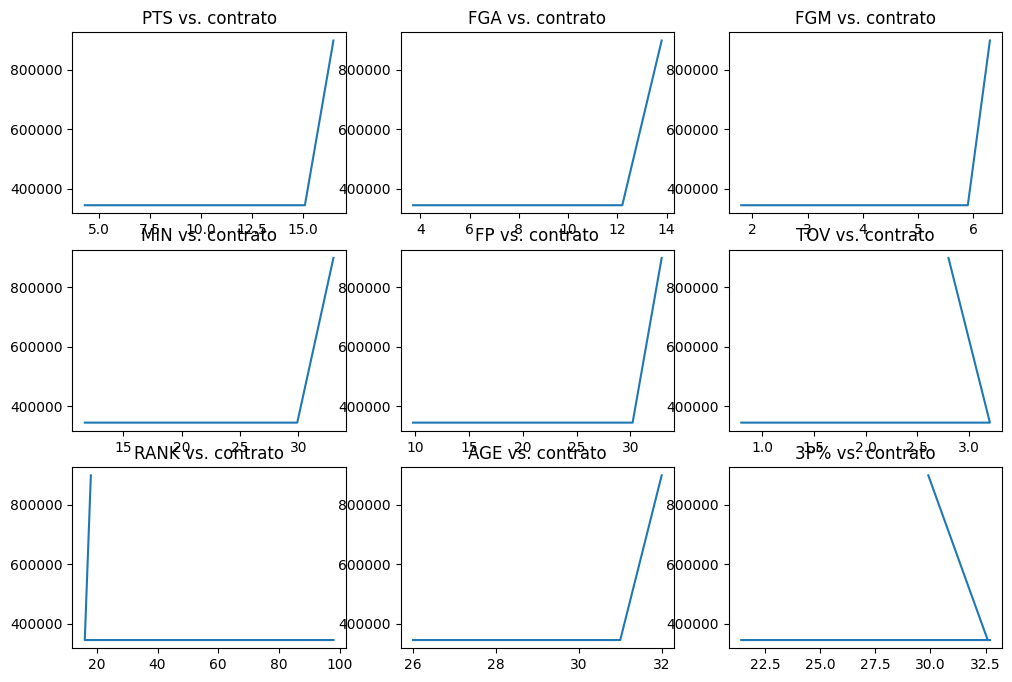

In [24]:
import numpy as np

def Analisis_individual(jugadora):
  jugadora_a_consultar  = str(jugadora)
  df_jugadora_a_graficar = df.loc[df['Nombre'] == jugadora_a_consultar]
  df_jugadora_contratos = df_jugadora_a_graficar.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  df_jugadora_pts = df_jugadora_a_graficar.filter(like= 'PTS').drop(columns = 'PTS 2024').stack().reset_index(drop=True)

  # Obtenemos la longitud del indice existente para df_jugadora_contratos
  index_len = len(df_jugadora_contratos.index)

  # Creamos una lista de años con la duración correcta
  años = list(range(2023, 2023 - index_len, -1)) #[2023, 2022, 2021, 2020]

  # Ahora asignamos el nuevo índice de forma correcta para evitar errores de dimensiones
  df_jugadora_contratos.index = años

  # Si df_jugadora_pts tiene una longitud diferente, ajuste en consecuencia
  if len(df_jugadora_pts.index) != index_len:
    # Ajuste la lista de años para df_jugadora_pts si es necesario
    pts_años = list(range(2023, 2023 - len(df_jugadora_pts.index), -1)) 
    df_jugadora_pts.index = pts_años
  else:
    df_jugadora_pts.index = años

  #print(df_jugadora_pts,df_jugadora_contratos)   #esto es para visualizar la informacion de los pts y los contratos

  #Graficar
  fig, ax1 = plt.subplots()  # Crea la figura y el primer eje
  ax1.plot(df_jugadora_pts, label='PTS')  # Grafica la primera curva en el primer eje
  ax1.set_xlabel('Año')  # Etiqueta del eje x
  ax1.set_ylabel('PTS', color='blue')  # Etiqueta del eje y primario (color azul)
  ax1.tick_params('y', labelcolor='blue') # Color de las etiqeutas del eje y primario

  ax2 = ax1.twinx()  # Crea un segundo eje (comparte el mismo eje)
  ax2.plot(df_jugadora_contratos, color='red', label='Contrato')  # Grafica la segunda curva en el segundo eje (color rojo)
  ax2.set_ylabel('Contrato', color='red')  # Etiqueta del eje y secundario (color rojo)
  ax2.tick_params('y', labelcolor='red')  # Color de las etiquetas del eje y secundario

  fig.tight_layout()  # Ajusta la gráfica
  plt.title(f'PTS vs. Contrato de {jugadora_a_consultar}') # Añade un título
  plt.legend() # Añade una leyenda
  plt.show()  # Muestra la gráfica

def graficar_individual_linea(datos_interes, df, player):
  print(datos_interes,player)
  fig, axes = plt.subplots(3, 3, figsize=(12, 8))
  df_player = df.loc[df['Nombre'] == player]
  y = df_player.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  for i in range(len(datos_interes)):
    #x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
    x = df_player.filter(like= datos_interes[i]).drop(columns = '{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
    #print(x)
    #print(y)
    # Ensure x and y have the same length
    min_len = min(len(x), len(y))
    x = x[:min_len]
    y = y[:min_len]
    if i < 3:
      axes[0,i].plot(x, y)
      axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
    elif i >= 3 and i < 6:
      axes[1,i - 3].plot(x, y)
      axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
    else:
      axes[2,i - 6].plot(x, y)
      axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
  ruta_guardado = f"C:/Users/gabog/OneDrive/Documentos/Curso de samsumg/ProyectoPowerRangers/Analisis_Datos/GraficasIndividuales/{player.replace(' ', '_')}.png" 
  plt.savefig(ruta_guardado) # Guardar la gráfica en la ruta especificada
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
  plt.show()

lista_de_todas_las_jugadoras = df['Nombre']

#realizar la grafica individual de cada jugadora PTS vs Contrato
#for i in lista_de_todas_las_jugadoras:
#    Analisis_individual(i)
    
  

#Se limpia los datos para solo tener los contratos que varian
datos_graficar = ['PTS', 'FGA', 'FGM', 'MIN','FP','TOV', 'RANK', 'AGE', '3P%']
nuevo_dataset = {'RANK' : [], 'AGE': [], 'GP': [], 'W': [], 'L': [], 'MIN': [], 'PTS': [], 'FGM': [], 'FGA': [], 'FG%': [], '3PM': [], '3PA': [], '3P%': [],
                  'FTM': [], 'FTA': [], 'FT%': [], 'OREB': [], 'DREB': [], 'REB': [], 'AST': [], 'TOV': [], 'STL': [], 'BLK': [], 'PF': [], 'FP': [], 'DD2': [],'TD3': [], '+/-': []}

df_contratos_diferentes = df.copy()
df_contratos = df.filter(like='Contrato')
df_contratos_colums = df_contratos.columns

for player in df['Nombre']:
    for i in range(len(años) - 2):
      if df.loc[df['Nombre'] == player, df_contratos_colums[i]].iloc[0] == df.loc[df['Nombre'] == player, df_contratos_colums[i + 1]].iloc[0]:
        df_contratos_diferentes.loc[df['Nombre'] == player, df_contratos_colums[i]] = np.nan
        for dato in nuevo_dataset.keys():
          df_contratos_diferentes.loc[df['Nombre'] == player, '{} {}'.format(dato,años[i+1])] = np.nan

df_contratos_diferentes.to_csv('datos_contratos_diferentes.csv')

for i in lista_de_todas_las_jugadoras:
    print('jugadora:', i)
    graficar_individual_linea(datos_graficar,df_contratos_diferentes, i)

2023    3.3
2022    4.0
2021    6.9
2020    7.1
dtype: float64 2023    108000.0
dtype: float64


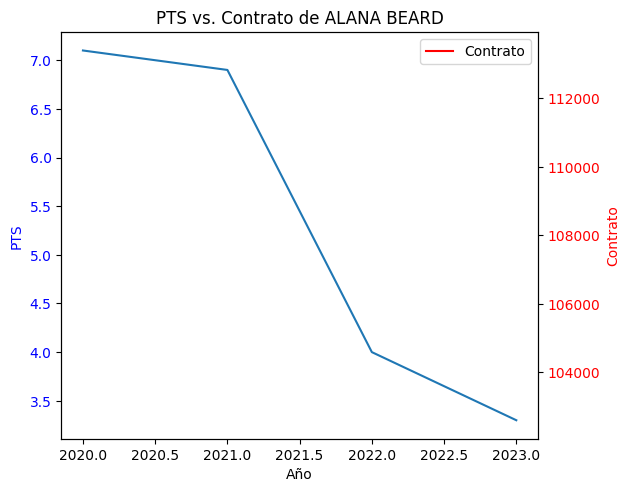

In [29]:
def Analisis_individual(jugadora):
  jugadora_a_consultar  = str(jugadora)
  df_jugadora_a_graficar = df.loc[df['Nombre'] == jugadora_a_consultar]
  df_jugadora_contratos = df_jugadora_a_graficar.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  df_jugadora_pts = df_jugadora_a_graficar.filter(like= 'PTS').drop(columns = 'PTS 2024').stack().reset_index(drop=True)

  # Obtenemos la longitud del indice existente para df_jugadora_contratos
  index_len = len(df_jugadora_contratos.index)

  # Creamos una lista de años con la duración correcta
  años = list(range(2023, 2023 - index_len, -1)) #[2023, 2022, 2021, 2020]

  # Ahora asignamos el nuevo índice de forma correcta para evitar errores de dimensiones
  df_jugadora_contratos.index = años

  # Si df_jugadora_pts tiene una longitud diferente, ajuste en consecuencia
  if len(df_jugadora_pts.index) != index_len:
    # Ajuste la lista de años para df_jugadora_pts si es necesario
    pts_años = list(range(2023, 2023 - len(df_jugadora_pts.index), -1)) 
    df_jugadora_pts.index = pts_años
  else:
    df_jugadora_pts.index = años

  print(df_jugadora_pts,df_jugadora_contratos)

  #Graficar
  fig, ax1 = plt.subplots()  # Crea la figura y el primer eje
  ax1.plot(df_jugadora_pts, label='PTS')  # Grafica la primera curva en el primer eje
  ax1.set_xlabel('Año')  # Etiqueta del eje x
  ax1.set_ylabel('PTS', color='blue')  # Etiqueta del eje y primario (color azul)
  ax1.tick_params('y', labelcolor='blue') # Color de las etiqeutas del eje y primario

  ax2 = ax1.twinx()  # Crea un segundo eje (comparte el mismo eje)
  ax2.plot(df_jugadora_contratos, color='red', label='Contrato')  # Grafica la segunda curva en el segundo eje (color rojo)
  ax2.set_ylabel('Contrato', color='red')  # Etiqueta del eje y secundario (color rojo)
  ax2.tick_params('y', labelcolor='red')  # Color de las etiquetas del eje y secundario

  fig.tight_layout()  # Ajusta la gráfica
  plt.title(f'PTS vs. Contrato de {jugadora_a_consultar}') # Añade un título
  plt.legend() # Añade una leyenda
  plt.show()  # Muestra la gráfica

jugadora_a_consultar = 'ALANA BEARD'
Analisis_individual(jugadora_a_consultar)

In [10]:
df_sue = df.loc[df['Nombre'] == 'SUE BIRD']
df_sue_contratos = df_sue.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
df_sue_pts = df_sue.filter(like= 'PTS').drop(columns = 'PTS 2024').stack().reset_index(drop=True)

#años = [2022,2021,2020,2019,2018,2017]
df_sue_contratos.index = años
df_sue_pts.index = años
print(df_sue_pts)


2022     7.8
2021    10.0
2020     9.8
2019    10.1
2018    10.6
2017    12.8
dtype: float64


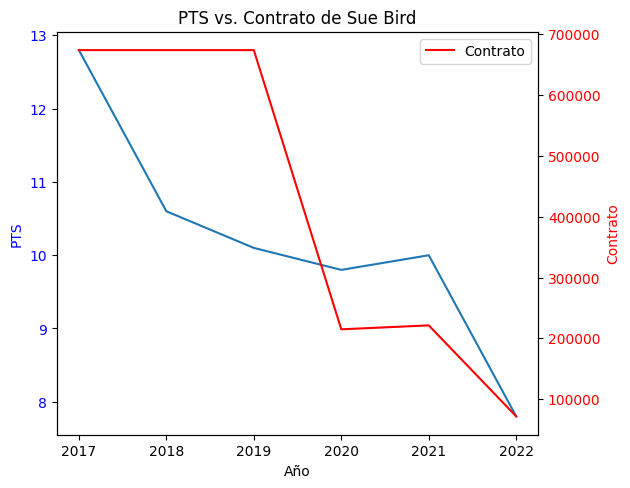

In [ ]:
fig, ax1 = plt.subplots()  # Crea la figura y el primer eje
ax1.plot(df_sue_pts, label='PTS')  # Grafica la primera curva en el primer eje
ax1.set_xlabel('Año')  # Etiqueta del eje x
ax1.set_ylabel('PTS', color='blue')  # Etiqueta del eje y primario (color azul)
ax1.tick_params('y', labelcolor='blue') # Color de las etiqeutas del eje y primario

ax2 = ax1.twinx()  # Crea un segundo eje (comparte el mismo eje)
ax2.plot(df_sue_contratos, color='red', label='Contrato')  # Grafica la segunda curva en el segundo eje (color rojo)
ax2.set_ylabel('Contrato', color='red')  # Etiqueta del eje y secundario (color rojo)
ax2.tick_params('y', labelcolor='red')  # Color de las etiquetas del eje y secundario

fig.tight_layout()  # Ajusta la gráfica
plt.title('PTS vs. Contrato de Sue Bird') # Añade un título
plt.legend() # Añade una leyenda
plt.show()  # Muestra la gráfica

Ahora se procede a ver todos los datos pero filtrados los contratos dobles

In [6]:
import numpy as np

#Se limpia los datos para solo tener los contratos que varian

nuevo_dataset = {'RANK' : [], 'AGE': [], 'GP': [], 'W': [], 'L': [], 'MIN': [], 'PTS': [], 'FGM': [], 'FGA': [], 'FG%': [], '3PM': [], '3PA': [], '3P%': [],
                  'FTM': [], 'FTA': [], 'FT%': [], 'OREB': [], 'DREB': [], 'REB': [], 'AST': [], 'TOV': [], 'STL': [], 'BLK': [], 'PF': [], 'FP': [], 'DD2': [],'TD3': [], '+/-': []}

df_contratos_diferentes = df.copy()
df_contratos = df.filter(like='Contrato')
df_contratos_colums = df_contratos.columns

for player in df['Nombre']:
    for i in range(len(años) - 2):
      if df.loc[df['Nombre'] == player, df_contratos_colums[i]].iloc[0] == df.loc[df['Nombre'] == player, df_contratos_colums[i + 1]].iloc[0]:
        df_contratos_diferentes.loc[df['Nombre'] == player, df_contratos_colums[i]] = np.nan
        for dato in nuevo_dataset.keys():
          df_contratos_diferentes.loc[df['Nombre'] == player, '{} {}'.format(dato,años[i+1])] = np.nan

df_contratos_diferentes.to_csv('datos_contratos_diferentes.csv')

          Nombre  Contrato 2024 Equipo 2024  Contrato 2023 Equipo 2023  \
229  MARIA CONDE            NaN         NaN            NaN         NaN   

     Contrato 2022 Equipo 2022  Contrato 2021 Equipo 2021  Contrato 2020  ...  \
229            NaN         NaN       115700.0         CHI       115700.0  ...   

    REB 2016  AST 2016 TOV 2016  STL 2016 BLK 2016  PF 2016 FP 2016  DD2 2016  \
229      NaN       NaN      NaN       NaN      NaN      NaN     NaN       NaN   

    TD3 2016  +/- 2016  
229      NaN       NaN  

[1 rows x 271 columns]
Series([], dtype: float64) 2023    115700.0
2022    115700.0
dtype: float64


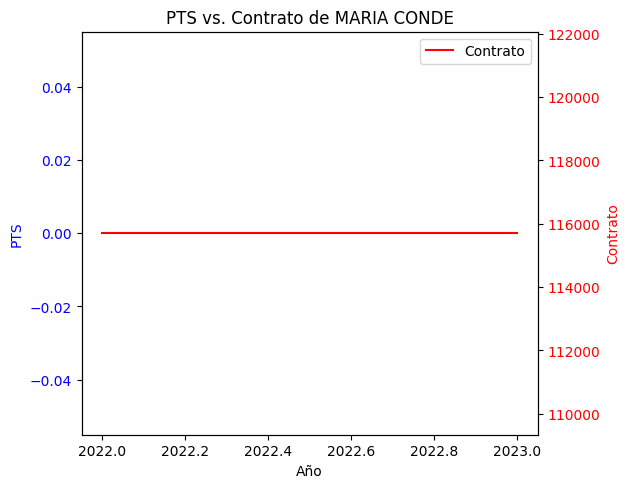

In [131]:
jugadora_a_consultar = 'MARIA CONDE'
df_jugadora_a_graficar = df.loc[df['Nombre'] == jugadora_a_consultar]
#df_jugadora_contratos = df_jugadora_a_graficar.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
print(df_jugadora_a_graficar)
Analisis_individual(jugadora_a_consultar)

Series([], dtype: float64)
0    115700.0
dtype: float64


ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

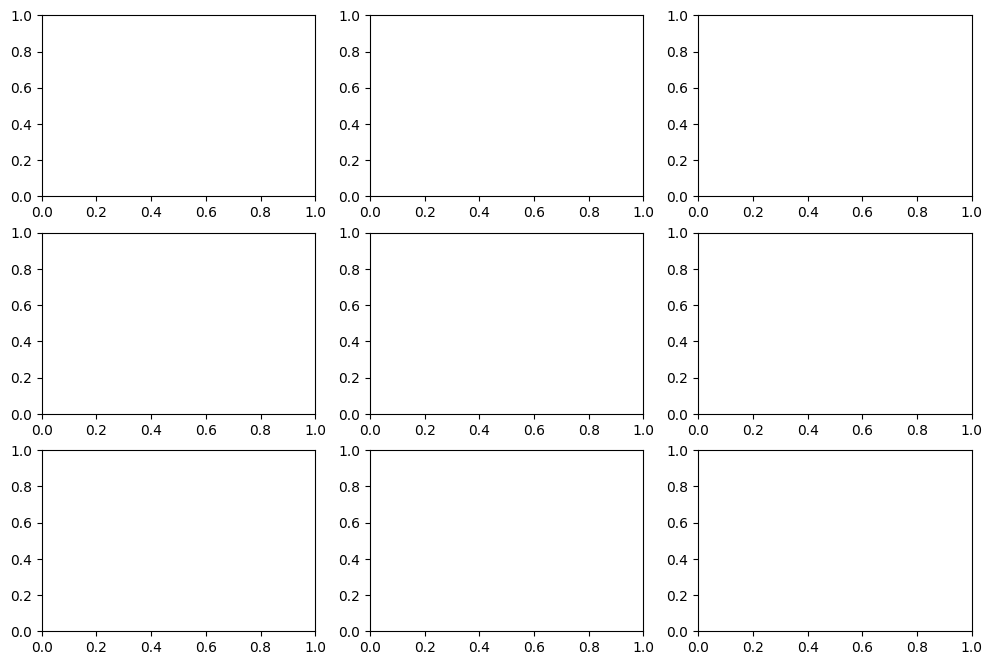

In [136]:
def graficar_individual_linea2(datos_interes, df, player):
  fig, axes = plt.subplots(3, 3, figsize=(12, 8))
  df_player = df.loc[df['Nombre'] == player]
  y = df_player.filter(like= 'Contrato').drop(columns = 'Contrato 2016').stack().reset_index(drop=True)
  for i in range(len(datos_interes)):
    #x, y = seleccionar_todos_dispersion(datos_graficar[i], df_contratos_diferentes)
    x = df_player.filter(like= datos_interes[i]).drop(columns = '{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
    print(x)
    print(y)
    if i < 3:
      axes[0,i].plot(x, y)
      axes[0,i].set_title('{} vs. contrato'.format(datos_graficar[i]))
    elif i >= 3 and i < 6:
      axes[1,i - 3].plot(x, y)
      axes[1,i - 3].set_title('{} vs. contrato'.format(datos_graficar[i]))
    else:
      axes[2,i - 6].plot(x, y)
      axes[2,i - 6].set_title('{} vs. contrato'.format(datos_graficar[i]))
  plt.tight_layout()
  plt.show()


años = [2023,2022]
#años = [2023,2022,2021]
#años = [2023,2022,2021,2020]
#años = [2023,2022,2021,2020,2019]
#años = [2023,2022,2021,2020,2019,2018]
#años = [2023,2022,2021,2020,2019,2018,2017]
#años = [2023,2022,2021,2020,2019,2018,2017,2016]
graficar_individual_linea2(datos_graficar,df_contratos_diferentes, 'MARIA CONDE')

Datos de 'y':
0    115700.0
dtype: float64
Datos de 'x' para PTS:
Series([], dtype: float64)
Datos ajustados para PTS (longitud mínima 0):
x: Series([], dtype: float64)
y: Series([], dtype: float64)
Datos de 'x' para FGA:
Series([], dtype: float64)
Datos ajustados para FGA (longitud mínima 0):
x: Series([], dtype: float64)
y: Series([], dtype: float64)
Datos de 'x' para FGM:
Series([], dtype: float64)
Datos ajustados para FGM (longitud mínima 0):
x: Series([], dtype: float64)
y: Series([], dtype: float64)
Datos de 'x' para MIN:
Series([], dtype: float64)
Datos ajustados para MIN (longitud mínima 0):
x: Series([], dtype: float64)
y: Series([], dtype: float64)
Datos de 'x' para FP:
Series([], dtype: float64)
Datos ajustados para FP (longitud mínima 0):
x: Series([], dtype: float64)
y: Series([], dtype: float64)
Datos de 'x' para TOV:
Series([], dtype: float64)
Datos ajustados para TOV (longitud mínima 0):
x: Series([], dtype: float64)
y: Series([], dtype: float64)
Datos de 'x' para RANK:

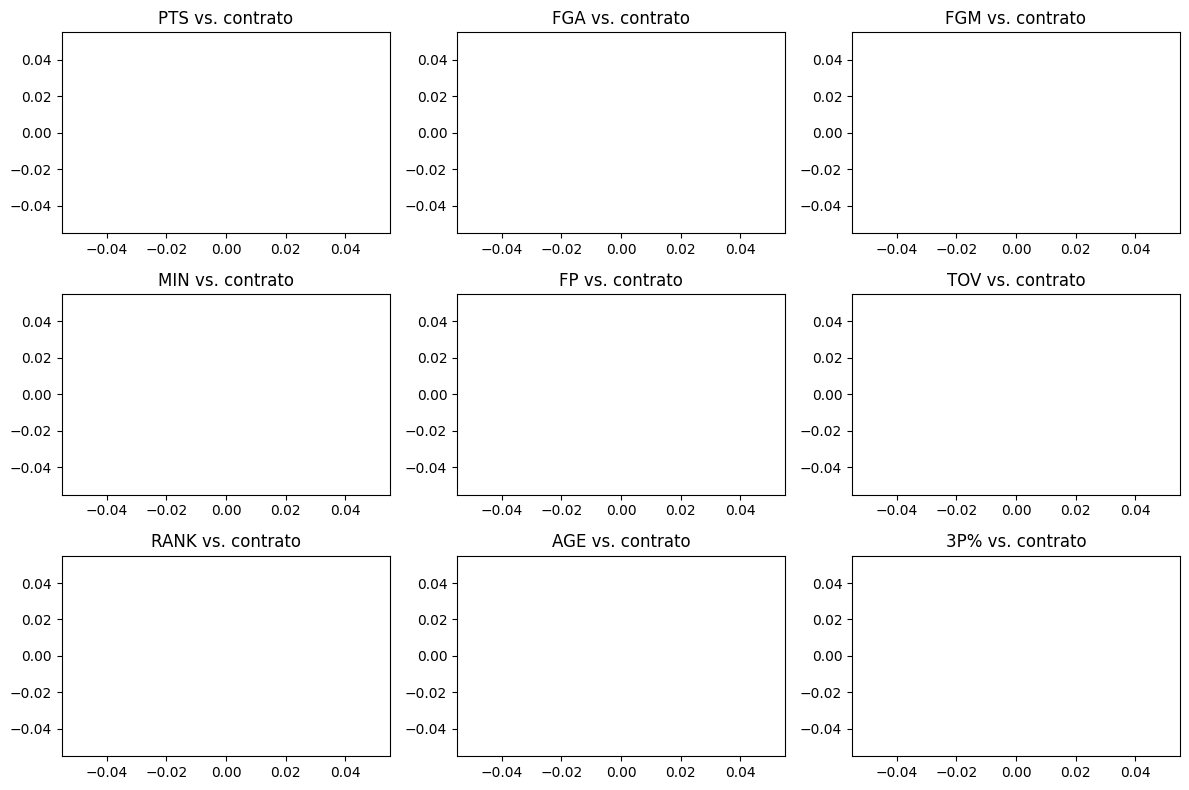

In [123]:
import matplotlib.pyplot as plt

def graficar_individual_linea3(datos_interes, df, player):
    fig, axes = plt.subplots(3, 3, figsize=(12, 8))
    df_player = df.loc[df['Nombre'] == player]
    y = df_player.filter(like='Contrato').drop(columns='Contrato 2016').stack().reset_index(drop=True)
    
    # Verificar los datos de 'y'
    print("Datos de 'y':")
    print(y.head(10))  # Mostrar solo las primeras 10 líneas
    
    for i in range(len(datos_interes)):
        x = df_player.filter(like=datos_interes[i]).drop(columns='{} 2024'.format(datos_interes[i])).stack().reset_index(drop=True)
        
        # Verificar los datos de 'x'
        print(f"Datos de 'x' para {datos_interes[i]}:")
        print(x.head(10))  # Mostrar solo las primeras 10 líneas
        
        # Ensure x and y have the same length
        min_len = min(len(x), len(y))
        x = x[:min_len]
        y = y[:min_len]
        
        # Verificar los datos después de ajustar la longitud
        print(f"Datos ajustados para {datos_interes[i]} (longitud mínima {min_len}):")
        print("x:", x.head(10))
        print("y:", y.head(10))
        
        if i < 3:
            axes[0, i].plot(x, y)
            axes[0, i].set_title(f'{datos_interes[i]} vs. contrato')
        elif i >= 3 and i < 6:
            axes[1, i - 3].plot(x, y)
            axes[1, i - 3].set_title(f'{datos_interes[i]} vs. contrato')
        else:
            axes[2, i - 6].plot(x, y)
            axes[2, i - 6].set_title(f'{datos_interes[i]} vs. contrato')

    plt.tight_layout()
    ruta_guardado = f"C:/Users/gabog/OneDrive/Documentos/Curso de samsumg/ProyectoPowerRangers/Analisis_Datos/Graficas/Fix_graficas/{player.replace(' ', '_')}.png"
    plt.savefig(ruta_guardado)  # Guardar la gráfica en la ruta especificada
    plt.show()

# Supongamos que tienes definido datos_graficar y df_contratos_diferentes correctamente
años = [2023, 2022, 2021, 2020]
graficar_individual_linea3(datos_graficar, df_contratos_diferentes, 'MARIA CONDE')
